In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


Importing the necessary libraries
No tensorflow or keras is used
Built using numpy from scratch

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the dataset

In [39]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [40]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)


#spliting the dataset into training and testing 
data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test =X_test/255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
m_train = X_train.shape[0]

In [41]:
Y_train

array([8, 2, 2, ..., 0, 8, 2])

In [42]:
def init_parameters():
    W1 = np.random.rand(10,784)-0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5 
    return W1,b1,W2,b2


def ReLU(Z):
    return np.maximum(0,Z)

#other functions such as sigmoid softplus etc can also be used to get the probabilities
def SoftMax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = SoftMax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z>0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, b1, dW2, db2, alpha):
    W1 = W1-alpha*dW1
    b1 = b1-alpha*db1
    W2 = W2-alpha*dW2
    b2 = b2-alpha*db2
    return W1, b1, W2, b2



In [43]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/Y.size


def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2,W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("iteration:", i)
            print("accuracy:", get_accuracy(get_predictions(A2),Y))
    return W1, b1, W2, b2
        

In [44]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

iteration: 0
[9 3 3 ... 8 8 9] [8 2 2 ... 0 8 2]
accuracy: 0.07729268292682927
iteration: 10
[0 0 9 ... 7 8 0] [8 2 2 ... 0 8 2]
accuracy: 0.13590243902439025
iteration: 20
[0 0 9 ... 0 3 0] [8 2 2 ... 0 8 2]
accuracy: 0.16739024390243903
iteration: 30
[3 0 9 ... 0 3 0] [8 2 2 ... 0 8 2]
accuracy: 0.19297560975609757
iteration: 40
[7 0 9 ... 0 3 2] [8 2 2 ... 0 8 2]
accuracy: 0.25246341463414634
iteration: 50
[9 0 9 ... 0 3 2] [8 2 2 ... 0 8 2]
accuracy: 0.2993170731707317
iteration: 60
[9 2 2 ... 0 4 2] [8 2 2 ... 0 8 2]
accuracy: 0.349390243902439
iteration: 70
[9 2 2 ... 0 4 2] [8 2 2 ... 0 8 2]
accuracy: 0.39875609756097563
iteration: 80
[9 2 2 ... 0 3 2] [8 2 2 ... 0 8 2]
accuracy: 0.4462439024390244
iteration: 90
[8 2 2 ... 0 3 2] [8 2 2 ... 0 8 2]
accuracy: 0.49073170731707316
iteration: 100
[8 2 2 ... 0 3 2] [8 2 2 ... 0 8 2]
accuracy: 0.5275853658536586
iteration: 110
[8 2 2 ... 0 8 2] [8 2 2 ... 0 8 2]
accuracy: 0.5642439024390243
iteration: 120
[8 2 2 ... 0 8 2] [8 2 2 ... 0

In [45]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


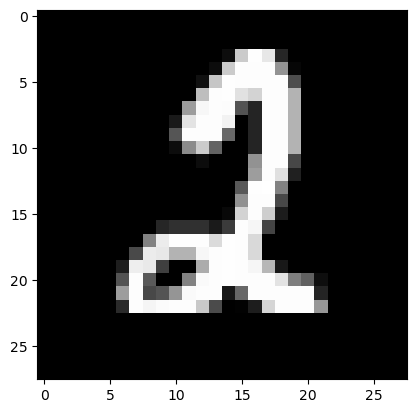

In [63]:
test_prediction(2, W1, b1, W2, b2)
# get_accuracy(test_predictions(5, W1, b1, W2, b2) ) was trying to find accuracy
# test_prediction(2, W1, b1, W2, b2)
# test_prediction(6, W1, b1, W2, b2)
# test_prediction(9, W1, b1, W2, b2)

In [64]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[7 6 9 7 7 7 0 6 0 0 8 8 2 6 9 3 9 7 0 3 7 4 4 5 1 8 2 1 1 5 2 6 3 4 1 0 4
 3 0 4 9 1 6 1 0 1 4 1 7 8 8 2 1 3 9 3 6 8 5 6 5 1 9 4 9 1 4 3 6 1 3 7 6 7
 7 3 3 2 0 8 1 7 8 1 7 3 0 6 7 9 3 7 9 2 8 9 8 7 2 5 1 0 0 5 1 4 6 3 8 7 6
 0 2 5 6 2 9 1 2 7 0 6 5 7 8 5 5 3 5 6 1 6 0 5 1 7 7 0 4 8 1 6 2 4 0 9 3 0
 0 0 3 4 4 6 6 7 1 1 2 1 8 0 1 5 5 5 0 9 1 9 1 8 8 3 7 1 7 2 2 8 6 9 8 4 8
 4 4 1 8 1 3 3 7 1 8 4 4 1 7 4 7 9 1 5 0 3 7 2 8 6 9 9 6 8 7 9 9 0 4 7 1 0
 8 3 9 5 9 7 6 1 2 4 5 9 6 2 6 5 2 8 7 5 6 9 4 8 8 3 5 9 4 3 4 2 0 8 5 2 0
 5 1 7 2 2 4 2 7 1 9 0 0 3 1 2 8 7 1 7 3 2 4 8 0 2 0 9 4 8 9 5 4 0 0 0 8 7
 4 9 8 8 1 8 1 6 5 9 0 3 5 5 0 1 6 6 8 3 7 4 6 8 5 7 4 3 3 5 7 4 2 1 3 9 5
 1 4 7 2 0 8 5 8 0 3 4 9 6 6 8 1 3 1 3 2 0 9 8 3 5 8 7 8 2 4 9 3 4 2 8 1 4
 6 7 9 0 0 7 5 3 2 0 6 5 6 7 5 7 5 5 3 4 3 7 8 8 6 6 1 2 0 1 2 7 3 5 4 1 4
 9 2 4 0 9 1 7 2 2 1 3 7 0 6 4 6 6 4 0 2 0 0 1 4 0 5 8 1 5 4 5 7 1 0 3 1 5
 6 9 7 6 9 7 8 6 0 7 1 3 6 2 7 1 1 3 9 6 7 8 2 7 8 5 0 4 0 0 2 8 8 4 7 0 9
 4 9 2 6 2 1 8 3 1 1 4 5 

0.852